## Roll no 201980050
## Name     Muhammad Nadeem
<p><img style="float: left;margin:5px 10px 5px 1px; max-width:550px" src="https://www.gift.edu.pk/images/gift-logo.png"></p>

## 1. The most Nobel of Prizes
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading in required libraries
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Reading in the Nobel Prize data
nobel_data = pd.read_csv('/content/drive/MyDrive/Raw Data/nobel.csv')  # Replace 'nobel_prize_data.csv' with the actual file path or URL

# Taking a look at the first several winners
print(nobel_data.head())






# Reading in the Nobel Prize data


# Taking a look at the first several winners
# ... YOUR CODE FOR TASK 1 ...


   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   

  laureate_type                     full_name  birth_date         birth_city  \
0    I

## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [6]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
# ... YOUR CODE FOR TASK 2 ...

total_prizes = nobel_data.shape[0]
print(f"Total number of Nobel Prizes handed out between 1901 and 2016: {total_prizes}")






# Display the number of prizes won by male and female recipients.
# ... YOUR CODE FOR TASK 2 ...

gender_distribution = nobel_data['sex'].value_counts()
print("\nNumber of Nobel Prizes won by gender:")
print(gender_distribution)


# Display the number of prizes won by the top 10 nationalities.
# ... YOUR CODE FOR TASK 2 ...

top_nationalities = nobel_data['birth_country'].value_counts().head(10)
print("\nNumber of Nobel Prizes won by the top 10 nationalities:")
print(top_nationalities)


Total number of Nobel Prizes handed out between 1901 and 2016: 911

Number of Nobel Prizes won by gender:
Male      836
Female     49
Name: sex, dtype: int64

Number of Nobel Prizes won by the top 10 nationalities:
United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64


## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>

In [7]:

# Converting the birth_date to datetime format
nobel_data['birth_date'] = pd.to_datetime(nobel_data['birth_date'], errors='coerce')

# Extracting the decade from the birth_date
nobel_data['decade'] = (nobel_data['birth_date'].dt.year // 10) * 10

# Calculating the proportion of USA born winners per decade
proportion_usa_per_decade = nobel_data[nobel_data['birth_country'] == 'United States of America'].groupby('decade').size() / nobel_data.groupby('decade').size()

# Display the proportions of USA born winners per decade
print("\nProportion of USA born winners per decade:")
print(proportion_usa_per_decade)







Proportion of USA born winners per decade:
decade
1810.0         NaN
1820.0         NaN
1830.0         NaN
1840.0    0.050000
1850.0    0.078947
1860.0    0.150943
1870.0    0.095238
1880.0    0.211538
1890.0    0.215385
1900.0    0.223404
1910.0    0.381356
1920.0    0.389381
1930.0    0.345455
1940.0    0.412844
1950.0    0.472222
1960.0    0.583333
1970.0         NaN
1990.0         NaN
dtype: float64


## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

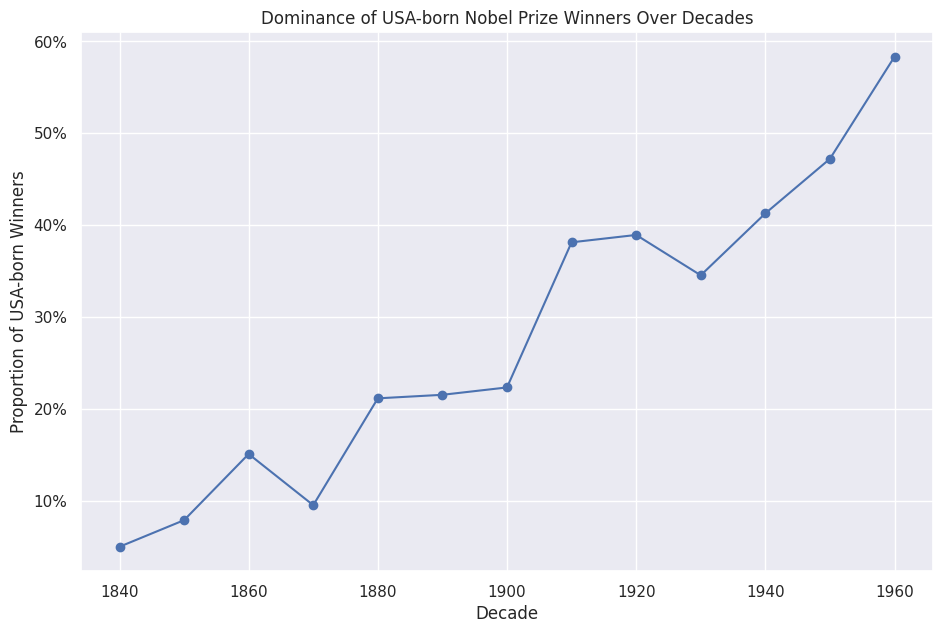

In [8]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners


# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
# ... YOUR CODE FOR TASK 4 ...

# Setting the plotting theme
sns.set()

# Setting the size of all plots
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners
plt.plot(proportion_usa_per_decade.index, proportion_usa_per_decade.values, marker='o', linestyle='-', color='b')

# Adding %-formatting to the y-axis
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Adding labels and title
plt.xlabel('Decade')
plt.ylabel('Proportion of USA-born Winners')
plt.title('Dominance of USA-born Nobel Prize Winners Over Decades')

# Display the plot
plt.show()




## 5. What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

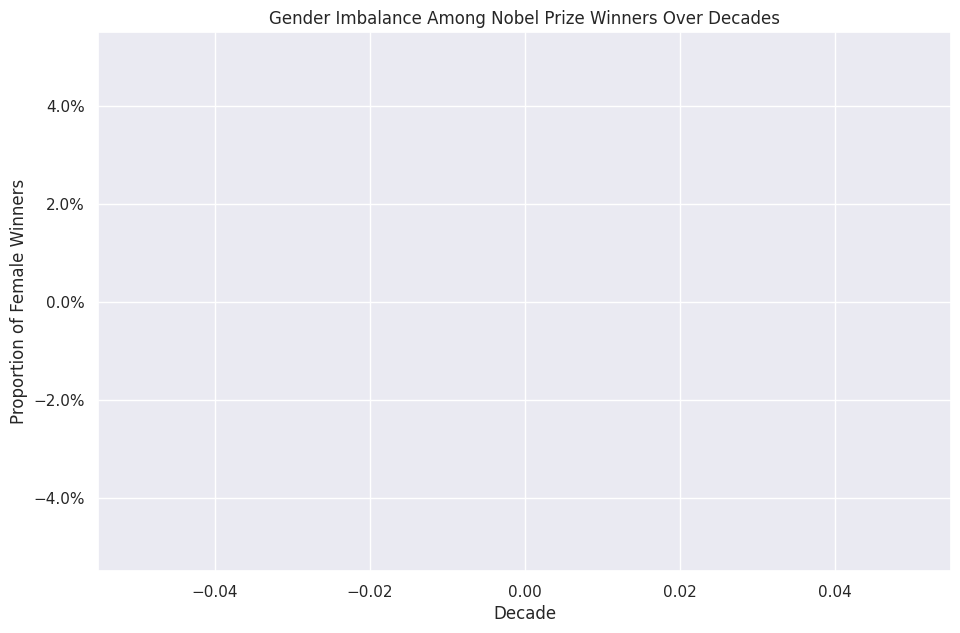

In [10]:
# Calculating the proportion of female laureates per decade


# Plotting USA born winners with % winners on the y-axis
# ... YOUR CODE FOR TASK 5 ...


# Plotting USA born winners


# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
# ... YOUR CODE FOR TASK 4 ...

# Calculating the proportion of female laureates per decade
proportion_female_per_decade = nobel_data[nobel_data['sex'] == 'female'].groupby('decade').size() / nobel_data.groupby('decade').size()

# Plotting the proportion of female laureates per decade
plt.plot(proportion_female_per_decade.index, proportion_female_per_decade.values, marker='o', linestyle='-', color='r')

# Adding %-formatting to the y-axis
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Adding labels and title
plt.xlabel('Decade')
plt.ylabel('Proportion of Female Winners')
plt.title('Gender Imbalance Among Nobel Prize Winners Over Decades')

# Display the plot
plt.show()




## 6. The first woman to win the Nobel Prize
<p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p>
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>

In [12]:
# Picking out the first woman to win a Nobel Prize
female_winners = nobel_data[nobel_data['sex'] == 'female'].sort_values(by='birth_date')

if not female_winners.empty:
    first_female_winner = female_winners.iloc[0]

    # Displaying information about the first female winner
    print("First Woman to Win a Nobel Prize:")
    print(f"Name: {first_female_winner['full_name']}")
    print(f"Category: {first_female_winner['category']}")
    print(f"Year: {first_female_winner['year']}")
else:
    print("No female Nobel Prize winners found in the dataset.")


No female Nobel Prize winners found in the dataset.


## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [13]:
# Selecting the laureates that have received 2 or more prizes.
# ... YOUR CODE FOR TASK 5 ...
# Selecting the laureates that have received 2 or more prizes
repeat_laureates = nobel_data.groupby('full_name').filter(lambda group: len(group) >= 2)

# Displaying information about laureates with 2 or more prizes
print("Laureates with 2 or more Nobel Prizes:")
print(repeat_laureates[['full_name', 'category', 'year']])


Laureates with 2 or more Nobel Prizes:
                                             full_name   category  year
19                         Marie Curie, née Sklodowska    Physics  1903
62                         Marie Curie, née Sklodowska  Chemistry  1911
89   Comité international de la Croix Rouge (Intern...      Peace  1917
215  Comité international de la Croix Rouge (Intern...      Peace  1944
278                                 Linus Carl Pauling  Chemistry  1954
283  Office of the United Nations High Commissioner...      Peace  1954
298                                       John Bardeen    Physics  1956
306                                   Frederick Sanger  Chemistry  1958
340                                 Linus Carl Pauling      Peace  1962
348  Comité international de la Croix Rouge (Intern...      Peace  1963
424                                       John Bardeen    Physics  1972
505                                   Frederick Sanger  Chemistry  1980
523  Office of the United

## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

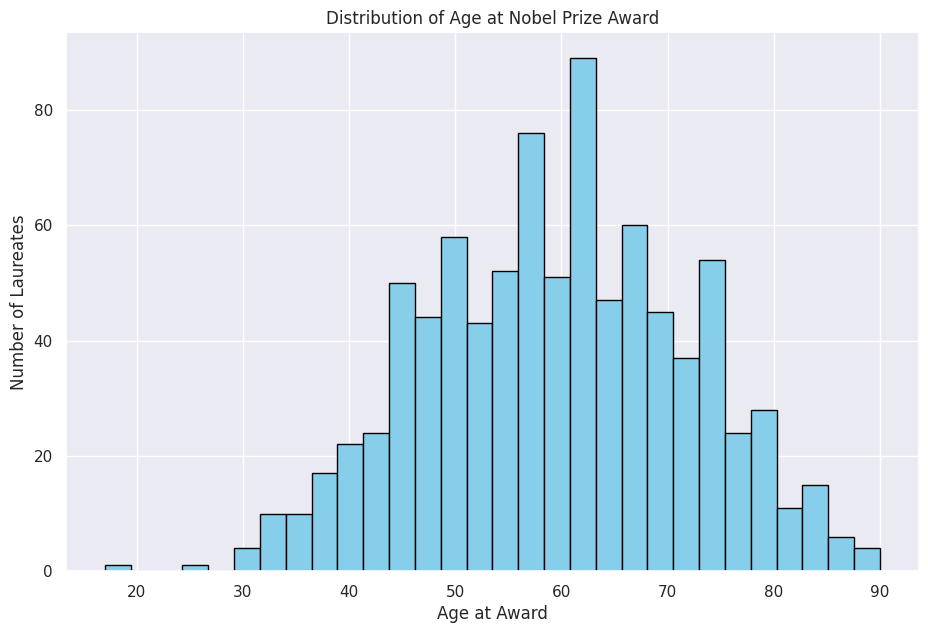

In [15]:
# Converting birth_date from String to datetime

nobel_data['birth_date'] = pd.to_datetime(nobel_data['birth_date'], errors='coerce')

# Calculating the age of Nobel Prize winners

nobel_data['age_at_award'] = nobel_data['year'] - nobel_data['birth_date'].dt.year

# Plotting the age of Nobel Prize winners

plt.hist(nobel_data['age_at_award'].dropna(), bins=30, color='skyblue', edgecolor='black')






# Adding labels and title
plt.xlabel('Age at Award')
plt.ylabel('Number of Laureates')
plt.title('Distribution of Age at Nobel Prize Award')

# Display the plot
plt.show()


## 9. Age differences between prize categories
<p>The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.</p>
<p>We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945). </p>
<p>Let's look at age trends within different prize categories.</p>

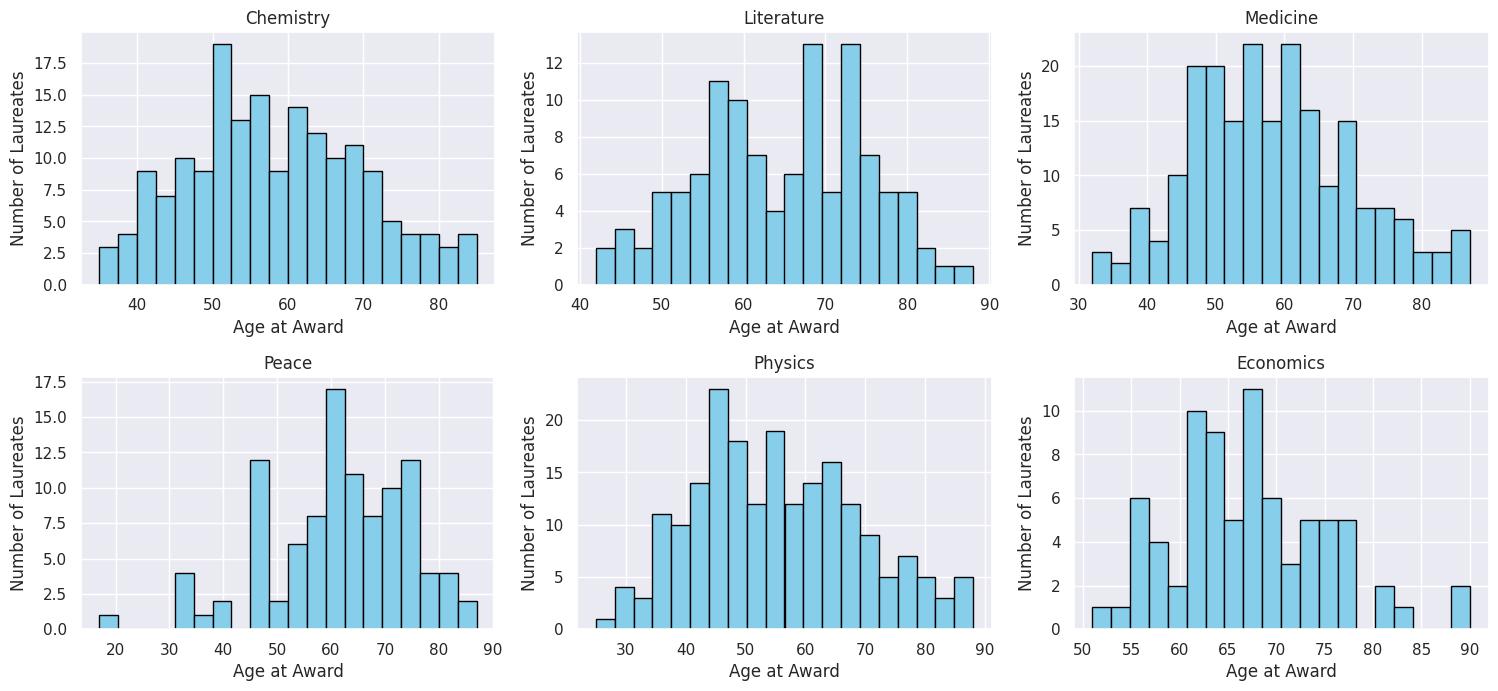

In [16]:
# Same plot as above, but separate plots for each type of Nobel Prize
# ... YOUR CODE FOR TASK 9 ...
# Same plot as above, but separate plots for each type of Nobel Prize
plt.figure(figsize=(15, 10))

# List of unique prize categories
prize_categories = nobel_data['category'].unique()

# Plotting age distribution for each prize category
for category in prize_categories:
    plt.subplot(3, 3, np.where(prize_categories == category)[0][0] + 1)
    plt.hist(nobel_data[nobel_data['category'] == category]['age_at_award'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(category)
    plt.xlabel('Age at Award')
    plt.ylabel('Number of Laureates')

# Adjusting layout
plt.tight_layout()

# Display the plots
plt.show()


## 10. Oldest and youngest winners
<p>More plots with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. We also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger! </p>
<p>In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

In [20]:
# The oldest winner of a Nobel Prize as of 2016
# ... YOUR CODE FOR TASK 10 ...

# The youngest winner of a Nobel Prize as of 2016
# ... YOUR CODE FOR TASK 10 ...
# The oldest winner of a Nobel Prize as of 2016
oldest_winner = nobel_data.loc[nobel_data['age_at_award'].idxmax()]

# The youngest winner of a Nobel Prize as of 2016
youngest_winner = nobel_data.loc[nobel_data['age_at_award'].idxmin()]

# Displaying information about the oldest and youngest winners
print("Oldest Winner of a Nobel Prize:")
print(f"Name: {oldest_winner['full_name']}")
print(f"Category: {oldest_winner['category']}")
print(f"Age at Award: {oldest_winner['age_at_award']}")
print(f"Year: {oldest_winner['year']}")

print("\nYoungest Winner of a Nobel Prize:")
print(f"Name: {youngest_winner['full_name']}")
print(f"Category: {youngest_winner['category']}")
print(f"Age at Award: {youngest_winner['age_at_award']}")
print(f"Year: {youngest_winner['year']}")


Oldest Winner of a Nobel Prize:
Name: Leonid Hurwicz
Category: Economics
Age at Award: 90.0
Year: 2007

Youngest Winner of a Nobel Prize:
Name: Malala Yousafzai
Category: Peace
Age at Award: 17.0
Year: 2014


## 11. You get a prize!

<p>Hey! You get a prize for making it to the very end of this notebook! It might not be a Nobel Prize, but I made it myself in paint so it should count for something. But don't despair, Leonid Hurwicz was 90 years old when he got his prize, so it might not be too late for you. Who knows.</p>
<p>Before you leave, what was again the name of the youngest winner ever who in 2014 got the prize for "[her] struggle against the suppression of children and young people and for the right of all children to education"?</p>

In [22]:
# The name of the youngest winner of the Nobel Prize as of 2016
#youngest_winner = '...'
print(youngest_winner['full_name'])

Malala Yousafzai
